In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv('PakistanDroneAttacksWithTemp Ver 11 (November 30 2017).csv', encoding='unicode_escape')
df.drop(columns=['References', 'Temperature(C)', 'Temperature(F)', 'Comments', 'Special Mention (Site)'], inplace=True)
df.set_index('S#', inplace=True)
df.head(5)

,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,Civilians Max,Foreigners Min,Foreigners Max,Total Died Min,Total Died Max,Injured Min,Injured Max,Women/Children,Longitude,Latitude
S#,,,,,,,,,,,,,,,,,,,
1,"Friday, June 18, 2004",22:00,Near Wana,south Waziristan,FATA,1.0,NaN,1.0,0.0,4.0,NaN,NaN,NaN,5.0,NaN,NaN,N,69.9000,33.0333
2,"Sunday, May 08, 2005",23:30,Mir Ali (Near Afghan Border),North Waziristan,FATA,1.0,1.0,NaN,0.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,N,70.1455,32.9746
3,"Thursday, December 01, 2005",NaN,Haisori- Miran Shah,North Waziristan,FATA,1.0,1.0,NaN,0.0,1.0,NaN,3.0,NaN,5.0,NaN,2.0,NaN,70.1455,32.9746
4,"Friday, January 06, 2006",NaN,Saidgai village- 115km north of Wana,North Waziristan,FATA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,70.1455,32.9746
5,"Friday, January 13, 2006",3:00,Damadola Village,Bajaur Agency,FATA,1.0,NaN,NaN,0.0,18.0,NaN,NaN,NaN,18.0,NaN,2.0,Y,71.5000,34.6833


In [177]:
df.columns = df.columns.str.strip(' ') # Removing white spaces from start and end of column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '-')
df.rename(columns={"total-died-mix": "total-died-max"}, inplace=True)

In [178]:
df.shape

(421, 19)

In [179]:
df.columns

Index(['date', 'time', 'location', 'city', 'province', 'no-of-strike',
       'al-qaeda', 'taliban', 'civilians-min', 'civilians-max',
       'foreigners-min', 'foreigners-max', 'total-died-min', 'total-died-max',
       'injured-min', 'injured-max', 'women/children', 'longitude',
       'latitude'],
      dtype='object')

In [180]:
df.isna().sum()

date                1
time              231
location            2
city                1
province           16
no-of-strike       16
al-qaeda          323
taliban           279
civilians-min      84
civilians-max      61
foreigners-min    327
foreigners-max    280
total-died-min    112
total-died-max     18
injured-min       275
injured-max       144
women/children     84
longitude          31
latitude           31
dtype: int64

In [181]:
df.dropna(subset=['date', 'location', 'city'], inplace=True)

We have found that there is 1 negative value in civilians-min and 4 rows of negative values in
civilians-max

In [182]:
negative_values = df.loc[:,df.dtypes == 'float64'] < 0
negative_values.sum()

no-of-strike      0
al-qaeda          0
taliban           0
civilians-min     1
civilians-max     3
foreigners-min    0
foreigners-max    0
total-died-min    0
total-died-max    0
injured-min       0
injured-max       0
longitude         0
latitude          0
dtype: int64

In [183]:
negative_index_civilians = df[(df['civilians-min'] < 0) | (df['civilians-max'] < 0) ].index
df.drop(negative_index_civilians, inplace=True)

In [184]:
df.describe()

,no-of-strike,al-qaeda,taliban,civilians-min,civilians-max,foreigners-min,foreigners-max,total-died-min,total-died-max,injured-min,injured-max,longitude,latitude
count,401.000000,97.000000,137.000000,332.000000,355.000000,93.000000,140.000000,307.000000,398.000000,145.000000,275.000000,386.000000,386.000000
mean,1.451372,0.505155,4.693431,3.945783,7.211268,0.731183,2.657143,6.325733,9.050251,2.772414,4.821818,68.561491,34.524720
std,1.121719,1.385368,5.237818,5.039729,8.308860,1.475450,3.787088,5.272145,7.994172,3.980412,5.182181,7.470321,7.325146
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.896179,25.678480
25%,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,5.000000,0.000000,2.000000,69.900000,32.974600
50%,1.000000,0.000000,4.000000,3.000000,6.000000,0.000000,2.000000,5.000000,6.000000,2.000000,4.000000,70.145500,32.974600
75%,1.000000,0.000000,7.000000,5.000000,8.500000,0.000000,4.000000,8.000000,10.000000,4.000000,6.000000,70.145500,33.033300
max,8.000000,7.000000,25.000000,40.000000,82.000000,5.000000,21.000000,40.000000,82.000000,25.000000,50.000000,71.500000,70.540720


/tmp/ipykernel_750407/3888966817.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

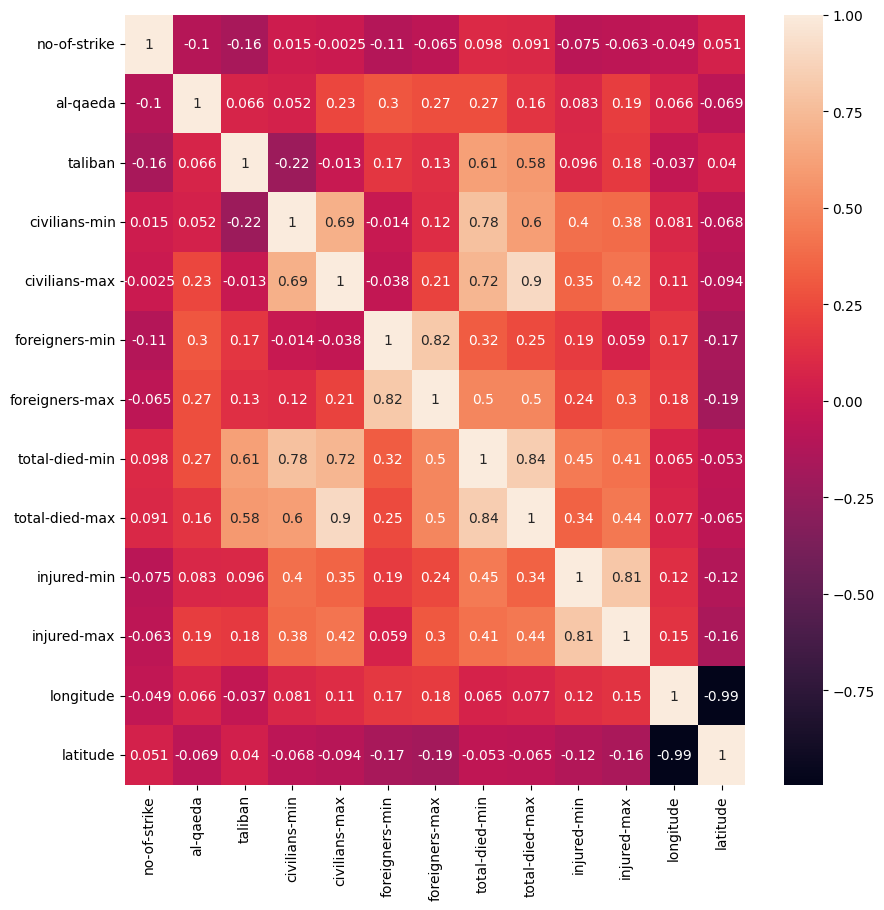

In [185]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: xlabel='total-died-max', ylabel='civilians-max'>

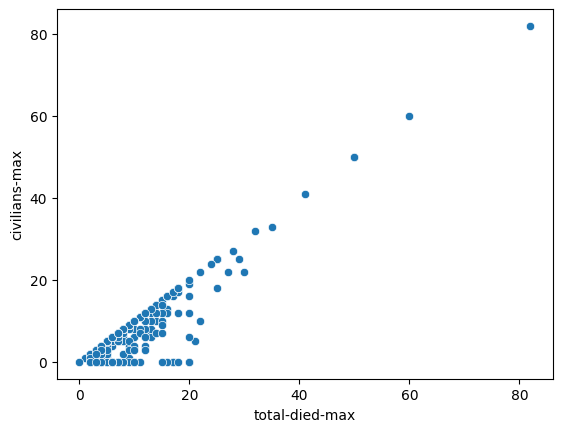

In [186]:
sns.scatterplot(data=df, x="total-died-max", y="civilians-max")

<AxesSubplot: xlabel='total-died-min', ylabel='civilians-min'>

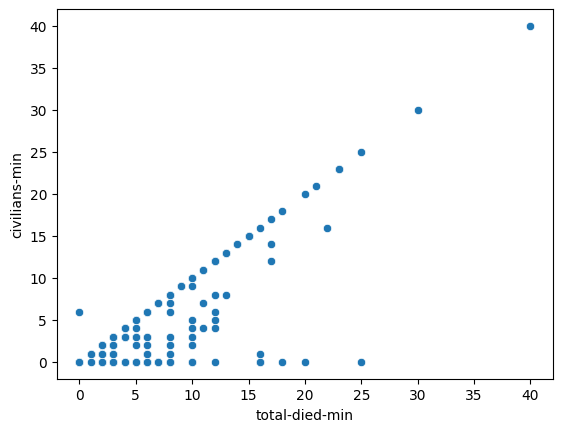

In [187]:
sns.scatterplot(data=df, x="total-died-min", y="civilians-min")